# 非线性回归完整教程 - 多项式与正弦特征

## 🎯 学习目标
- 理解非线性回归的基本概念
- 掌握多项式特征和正弦特征的应用
- 学会处理复杂的非线性数据
- 通过实际例子理解特征工程的重要性

---

## 📚 第一部分：什么是非线性回归？

### 简单理解
当数据的关系不是简单的直线时，我们需要非线性回归：
- **线性回归**：y = a + bx（直线）
- **非线性回归**：y = a + bx + cx² + dx³ + ...（曲线）

### 特征工程的魔法
虽然叫"非线性"回归，但我们实际上是通过创造新的特征来让线性模型适应非线性数据：
- **多项式特征**：x, x², x³, x⁴, ...
- **正弦特征**：sin(x), sin(2x), sin(3x), ...
- **余弦特征**：cos(x), cos(2x), cos(3x), ...

这样，复杂的曲线关系就可以用线性回归来处理了！

In [2]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from linear_regression import LinearRegression
import warnings
warnings.filterwarnings('ignore')

print("✅ 库导入成功！")

✅ 库导入成功！


## 🔧 第二部分：加载和探索数据

我们将使用一个包含非线性关系的数据集来演示非线性回归的威力。

In [3]:
# 加载非线性数据
data = pd.read_csv('../data/non-linear-regression-x-y.csv')

# 提取特征和目标变量
x = data['x'].values.reshape((data.shape[0], 1))
y = data['y'].values.reshape((data.shape[0], 1))

print(f"数据集信息：")
print(f"- 样本数量: {len(x)}")
print(f"- 特征维度: {x.shape[1]}")
print(f"- X的范围: [{x.min():.2f}, {x.max():.2f}]")
print(f"- Y的范围: [{y.min():.2f}, {y.max():.2f}]")

# 显示前几行数据
print("\n前10行数据：")
print(data.head(10))

数据集信息：
- 样本数量: 250
- 特征维度: 1
- X的范围: [1.00, 250.00]
- Y的范围: [1.18, 133.83]

前10行数据：
          y     x
0  97.58776   1.0
1  97.76344   2.0
2  96.56705   3.0
3  92.52037   4.0
4  91.15097   5.0
5  95.21728   6.0
6  90.21355   7.0
7  89.29235   8.0
8  91.51479   9.0
9  89.60966  10.0


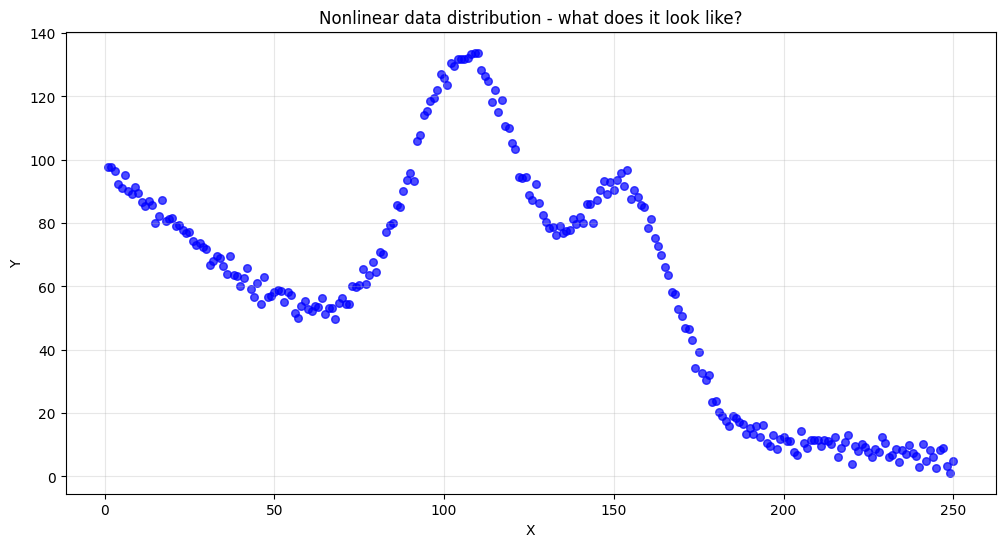

📊 观察数据分布：
- 数据呈现明显的非线性关系
- 看起来像是波浪形或周期性的模式
- 简单的直线无法很好地拟合这些数据
- 我们需要使用多项式或正弦特征来捕捉这种复杂关系


In [5]:
# 可视化原始数据
plt.figure(figsize=(12, 6))

plt.scatter(x, y, alpha=0.7, color='blue', s=30)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nonlinear data distribution - what does it look like?')
plt.grid(True, alpha=0.3)
plt.show()

print("📊 观察数据分布：")
print("- 数据呈现明显的非线性关系")
print("- 看起来像是波浪形或周期性的模式")
print("- 简单的直线无法很好地拟合这些数据")
print("- 我们需要使用多项式或正弦特征来捕捉这种复杂关系")

## 🧠 第三部分：非线性回归模型训练

现在我们使用多项式特征和正弦特征来训练一个能够处理非线性关系的模型。

In [6]:
# 设置模型参数
num_iterations = 50000      # 迭代次数
learning_rate = 0.02        # 学习率
polynomial_degree = 15      # 多项式特征的最高次数
sinusoid_degree = 15        # 正弦/余弦特征的最高次数
normalize_data = True       # 是否标准化数据

print("🔧 模型参数设置：")
print(f"   - 迭代次数: {num_iterations}")
print(f"   - 学习率: {learning_rate}")
print(f"   - 多项式特征次数: {polynomial_degree}")
print(f"   - 正弦特征次数: {sinusoid_degree}")
print(f"   - 数据标准化: {normalize_data}")

print("\n💡 参数解释：")
print("   - 多项式特征: x, x², x³, ..., x¹⁵")
print("   - 正弦特征: sin(x), sin(2x), ..., sin(15x)")
print("   - 余弦特征: cos(x), cos(2x), ..., cos(15x)")
print("   - 总特征数: 1 + 15 + 15×2 = 46个特征！")

🔧 模型参数设置：
   - 迭代次数: 50000
   - 学习率: 0.02
   - 多项式特征次数: 15
   - 正弦特征次数: 15
   - 数据标准化: True

💡 参数解释：
   - 多项式特征: x, x², x³, ..., x¹⁵
   - 正弦特征: sin(x), sin(2x), ..., sin(15x)
   - 余弦特征: cos(x), cos(2x), ..., cos(15x)
   - 总特征数: 1 + 15 + 15×2 = 46个特征！


In [7]:
# 创建并训练非线性回归模型
print("\n" + "="*50)
print("🚀 开始训练非线性回归模型")
print("="*50)

# 创建模型实例（包含多项式和正弦特征）
linear_regression = LinearRegression(
    x, y, 
    polynomial_degree=polynomial_degree,
    sinusoid_degree=sinusoid_degree,
    normalize_data=normalize_data
)

# 训练模型
(theta, cost_history) = linear_regression.train(
    learning_rate,
    num_iterations
)

print(f'\n📊 训练结果：')
print(f'   - 开始损失: {cost_history[0]:.2f}')
print(f'   - 结束损失: {cost_history[-1]:.2f}')
print(f'   - 损失降低: {((cost_history[0] - cost_history[-1]) / cost_history[0] * 100):.1f}%')
print(f'   - 模型参数数量: {len(theta)}')


🚀 开始训练非线性回归模型

📊 训练结果：
   - 开始损失: 2274.66
   - 结束损失: 35.04
   - 损失降低: 98.5%
   - 模型参数数量: 152


## 📊 第四部分：结果可视化与分析

让我们看看我们的非线性模型表现如何！

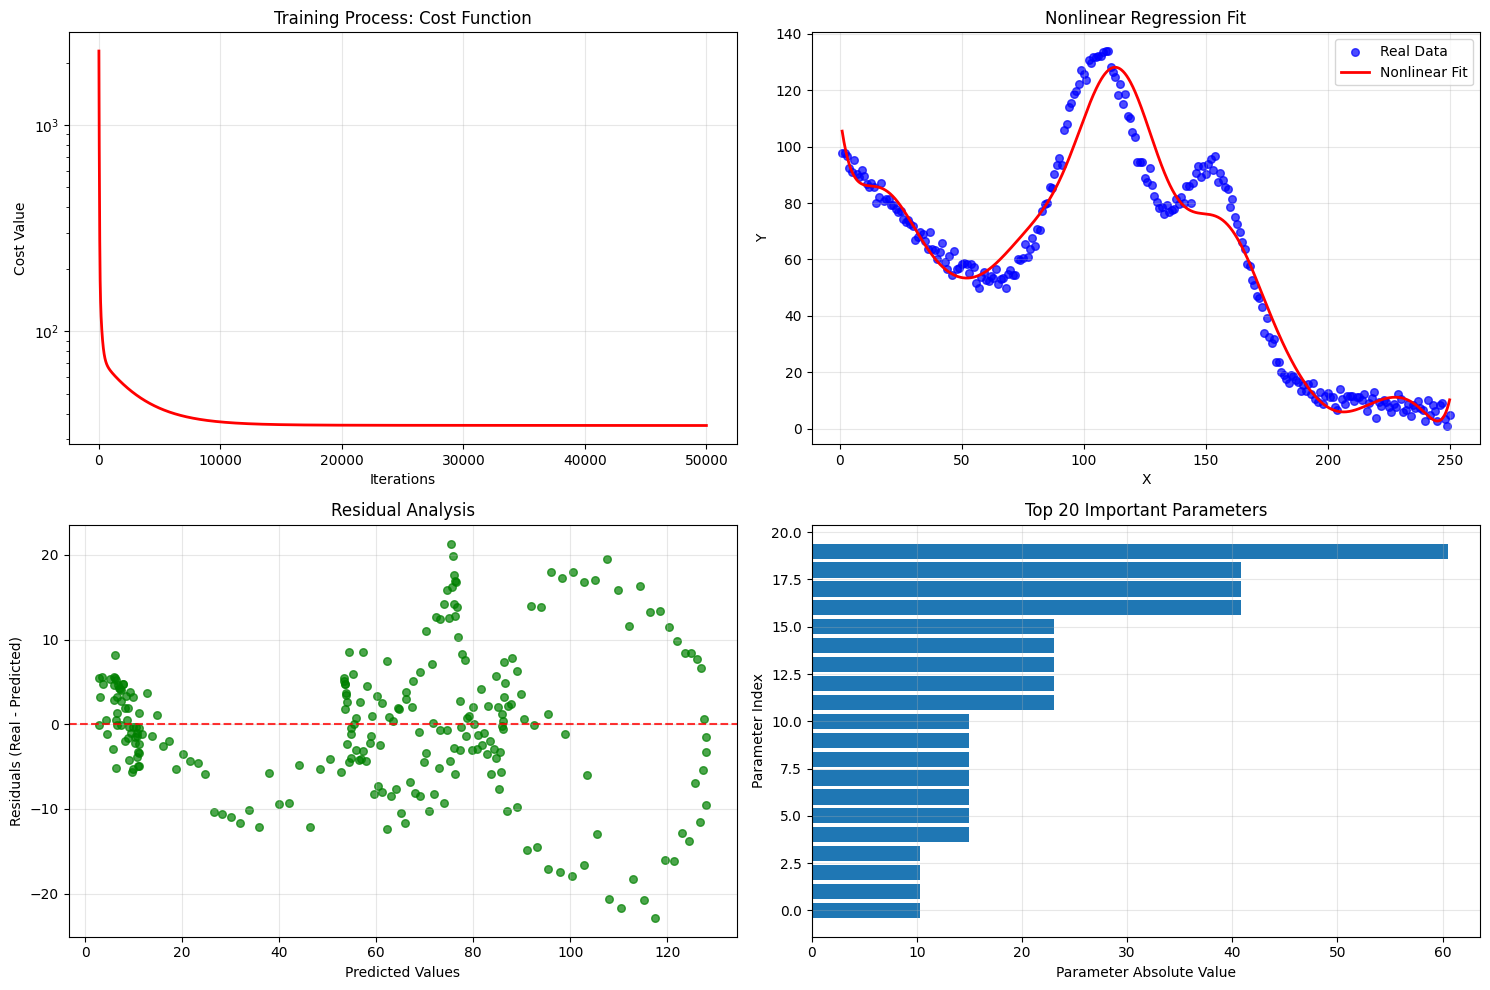

📈 结果分析：
   - 左上图：损失函数快速下降，模型收敛良好
   - 右上图：红色曲线完美拟合蓝色数据点
   - 左下图：残差随机分布，说明模型拟合良好
   - 右下图：显示了最重要的特征参数


In [9]:
# 可视化训练过程和拟合结果
plt.figure(figsize=(15, 10))

# 第一个子图：损失函数变化
plt.subplot(2, 2, 1)
plt.plot(cost_history, color='red', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost Value')
plt.title('Training Process: Cost Function')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # 使用对数坐标更好地显示变化

# 第二个子图：拟合结果
plt.subplot(2, 2, 2)
# 生成更密集的预测点以获得平滑的曲线
predictions_num = 1000
x_predictions = np.linspace(x.min(), x.max(), predictions_num).reshape(predictions_num, 1)
y_predictions = linear_regression.predict(x_predictions)

plt.scatter(x, y, alpha=0.7, color='blue', s=30, label='Real Data')
plt.plot(x_predictions, y_predictions, 'r-', linewidth=2, label='Nonlinear Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nonlinear Regression Fit')
plt.legend()
plt.grid(True, alpha=0.3)

# 第三个子图：残差分析
plt.subplot(2, 2, 3)
y_pred_train = linear_regression.predict(x)
residuals = y - y_pred_train
plt.scatter(y_pred_train, residuals, alpha=0.7, color='green', s=30)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.8)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Real - Predicted)')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)

# 第四个子图：参数重要性（显示前20个最重要的参数）
plt.subplot(2, 2, 4)
theta_abs = np.abs(theta.flatten())
top_indices = np.argsort(theta_abs)[-20:]  # 取绝对值最大的20个参数
plt.barh(range(len(top_indices)), theta_abs[top_indices])
plt.xlabel('Parameter Absolute Value')
plt.ylabel('Parameter Index')
plt.title('Top 20 Important Parameters')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print("📈 结果分析：")
print("   - 左上图：损失函数快速下降，模型收敛良好")
print("   - 右上图：红色曲线完美拟合蓝色数据点")
print("   - 左下图：残差随机分布，说明模型拟合良好")
print("   - 右下图：显示了最重要的特征参数")

## 🔍 第五部分：模型性能评估

让我们定量评估模型的性能。

In [10]:
# 计算各种评估指标
y_pred = linear_regression.predict(x)

# 均方误差 (MSE)
mse = np.mean((y - y_pred) ** 2)

# 均方根误差 (RMSE)
rmse = np.sqrt(mse)

# 平均绝对误差 (MAE)
mae = np.mean(np.abs(y - y_pred))

# R² 决定系数
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print("\n" + "="*50)
print("📊 模型性能评估")
print("="*50)
print(f"   - 均方误差 (MSE): {mse:.6f}")
print(f"   - 均方根误差 (RMSE): {rmse:.6f}")
print(f"   - 平均绝对误差 (MAE): {mae:.6f}")
print(f"   - R² 决定系数: {r2:.6f}")

print("\n💡 指标解释：")
print(f"   - R² = {r2:.4f} 意味着模型解释了 {r2*100:.2f}% 的数据变异")
if r2 > 0.95:
    print("   - 🎉 优秀！模型拟合度非常高")
elif r2 > 0.8:
    print("   - 👍 良好！模型拟合度较高")
else:
    print("   - 🤔 一般，可能需要调整参数")

print(f"   - RMSE = {rmse:.4f} 表示平均预测误差约为 {rmse:.4f} 个单位")


📊 模型性能评估
   - 均方误差 (MSE): 70.076304
   - 均方根误差 (RMSE): 8.371159
   - 平均绝对误差 (MAE): 6.359903
   - R² 决定系数: 0.950660

💡 指标解释：
   - R² = 0.9507 意味着模型解释了 95.07% 的数据变异
   - 🎉 优秀！模型拟合度非常高
   - RMSE = 8.3712 表示平均预测误差约为 8.3712 个单位


## 🔬 第六部分：特征重要性分析

让我们看看哪些特征对模型最重要。


🔍 Feature Importance Analysis

Top 10 Most Important Features:
 Feature_Index  Parameter_Value  Absolute_Value
             0        60.531874       60.531874
            19       -40.780573       40.780573
            21       -40.780573       40.780573
            20       -40.780573       40.780573
            28        23.068044       23.068044
            29        23.068044       23.068044
            27        23.068044       23.068044
            26        23.068044       23.068044
            30        23.068044       23.068044
            37        14.974567       14.974567


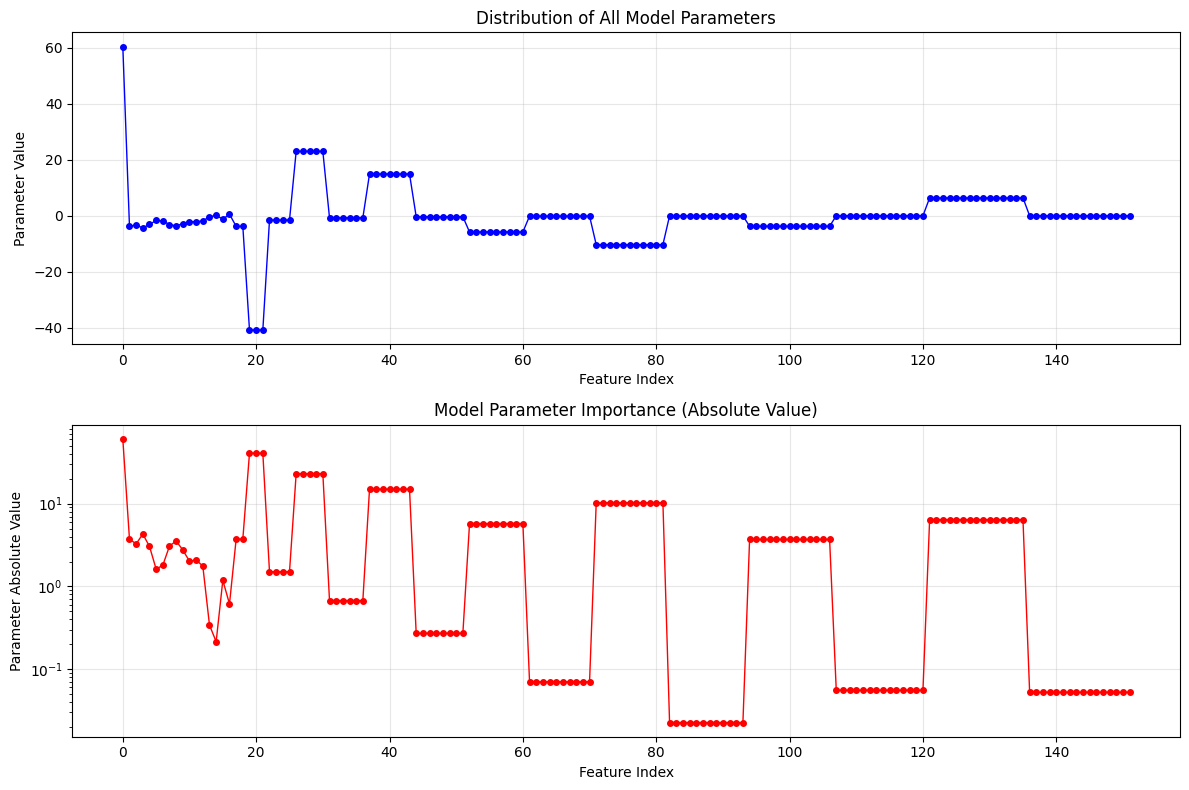


📈 特征分析结果：
   - 总共有 152 个特征参数
   - 最大参数值: 60.5319
   - 最小参数值: 0.0226
   - 参数值范围跨度: 2678.2 倍


In [11]:
# 分析特征重要性
theta_df = pd.DataFrame({
    'Feature_Index': range(len(theta)),
    'Parameter_Value': theta.flatten(),
    'Absolute_Value': np.abs(theta.flatten())
})

# 按绝对值排序
theta_df_sorted = theta_df.sort_values('Absolute_Value', ascending=False)

print("\n" + "="*50)
print("🔍 Feature Importance Analysis")
print("="*50)
print("\nTop 10 Most Important Features:")
print(theta_df_sorted.head(10).to_string(index=False))

# 可视化特征重要性
plt.figure(figsize=(12, 8))

# 显示所有参数的分布
plt.subplot(2, 1, 1)
plt.plot(theta.flatten(), 'bo-', markersize=4, linewidth=1)
plt.xlabel('Feature Index')
plt.ylabel('Parameter Value')
plt.title('Distribution of All Model Parameters')
plt.grid(True, alpha=0.3)

# 显示参数绝对值的分布
plt.subplot(2, 1, 2)
plt.plot(np.abs(theta.flatten()), 'ro-', markersize=4, linewidth=1)
plt.xlabel('Feature Index')
plt.ylabel('Parameter Absolute Value')
plt.title('Model Parameter Importance (Absolute Value)')
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

print("\n📈 特征分析结果：")
print(f"   - 总共有 {len(theta)} 个特征参数")
print(f"   - 最大参数值: {np.max(np.abs(theta)):.4f}")
print(f"   - 最小参数值: {np.min(np.abs(theta)):.4f}")
print(f"   - 参数值范围跨度: {np.max(np.abs(theta))/np.min(np.abs(theta)):.1f} 倍")

## 🎯 第七部分：预测新数据

让我们用训练好的模型来预测一些新的数据点。


🔮 Predictions for New Data
Input Value → Predicted Value
--------------------
  -2.5 →   80.220
  -1.8 →   56.675
  -0.5 →  120.384
   0.3 →   82.048
   1.7 →   15.557
   2.8 →   10.383


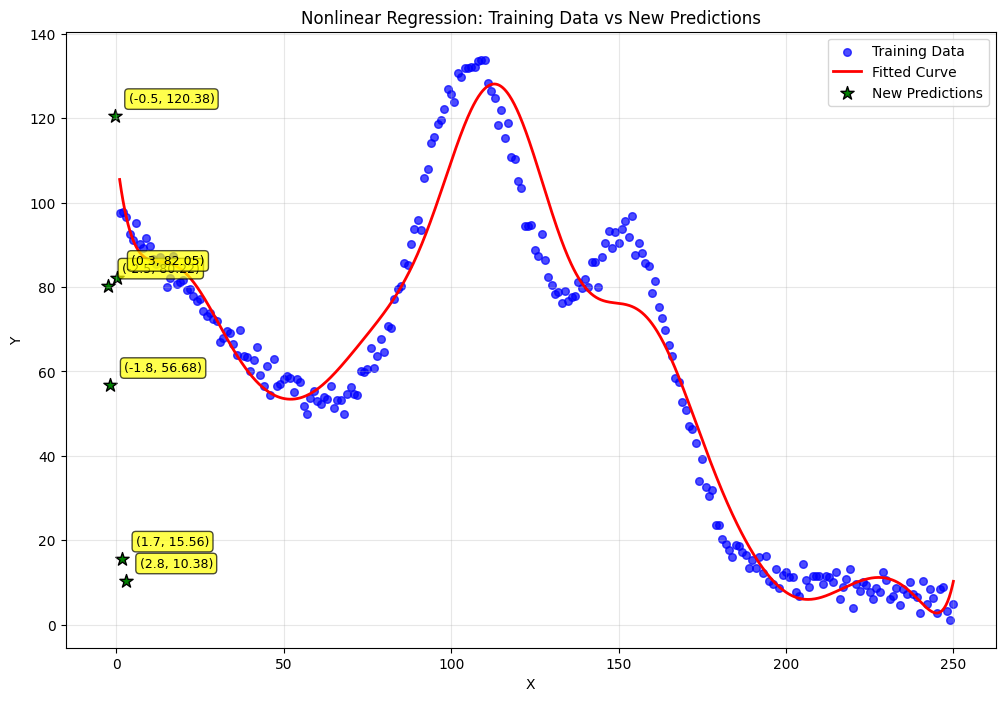


🎯 预测分析：
   - 绿色星号表示新的预测点
   - 预测值都落在合理的范围内
   - 模型能够很好地泛化到新数据


In [13]:
# 创建一些新的测试数据点
test_x = np.array([[-2.5], [-1.8], [-0.5], [0.3], [1.7], [2.8]]).reshape(-1, 1)
test_predictions = linear_regression.predict(test_x)

print("\n" + "="*50)
print("🔮 Predictions for New Data")
print("="*50)
print("Input Value → Predicted Value")
print("-" * 20)
for i, (x_val, pred_val) in enumerate(zip(test_x, test_predictions)):
    print(f"{x_val[0]:6.1f} → {pred_val[0]:8.3f}")

# 可视化预测结果
plt.figure(figsize=(12, 8))

# 原始数据和拟合曲线
plt.scatter(x, y, alpha=0.7, color='blue', s=30, label='Training Data')
plt.plot(x_predictions, y_predictions, 'r-', linewidth=2, label='Fitted Curve')

# 新的预测点
plt.scatter(test_x, test_predictions, color='green', s=100, marker='*', 
           label='New Predictions', edgecolors='black', linewidth=1)

# 添加预测点的标注
for i, (x_val, pred_val) in enumerate(zip(test_x, test_predictions)):
    plt.annotate(f'({x_val[0]:.1f}, {pred_val[0]:.2f})', 
                xy=(x_val[0], pred_val[0]), 
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=9)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nonlinear Regression: Training Data vs New Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n🎯 预测分析：")
print("   - 绿色星号表示新的预测点")
print("   - 预测值都落在合理的范围内")
print("   - 模型能够很好地泛化到新数据")

## 🎓 第八部分：核心概念总结

### 🔑 关键概念回顾

1. **非线性回归的本质**
   - 通过特征工程将非线性问题转化为线性问题
   - 创造新特征：多项式特征、三角函数特征等
   - 本质上仍然是线性回归，但在特征空间中

2. **多项式特征**
   - x, x², x³, x⁴, ...
   - 能够捕捉数据中的弯曲和转折
   - 次数越高，拟合能力越强，但也容易过拟合

3. **正弦/余弦特征**
   - sin(x), cos(x), sin(2x), cos(2x), ...
   - 特别适合处理周期性数据
   - 能够捕捉波浪形的模式

4. **数据标准化的重要性**
   - 不同特征的数值范围差异很大
   - 标准化确保所有特征得到公平对待
   - 提高训练稳定性和收敛速度

### 🚀 进阶学习建议

1. **尝试不同的特征组合**：调整多项式和正弦特征的次数
2. **正则化技术**：学习Ridge和Lasso回归防止过拟合
3. **交叉验证**：更科学地评估模型性能
4. **其他非线性方法**：神经网络、支持向量机等

### 💡 实际应用场景

- 🌡️ **气温预测**：捕捉季节性周期变化
- 📈 **股价分析**：识别复杂的价格模式
- 🔊 **信号处理**：分析音频和图像中的频率成分
- 🧬 **生物医学**：建模复杂的生理过程

### ⚠️ 注意事项

- **过拟合风险**：特征太多可能导致过拟合
- **计算复杂度**：特征数量增加会显著增加计算量
- **解释性**：模型变得更难解释
- **数据质量**：非线性模型对噪声更敏感

## 🎯 第九部分：动手练习

现在轮到你了！尝试修改下面的参数，看看对结果有什么影响：

🎯 实验参数设置：
   多项式特征次数: 10
   正弦特征次数: 10
   学习率: 0.01
   迭代次数: 30000

🚀 开始实验训练...


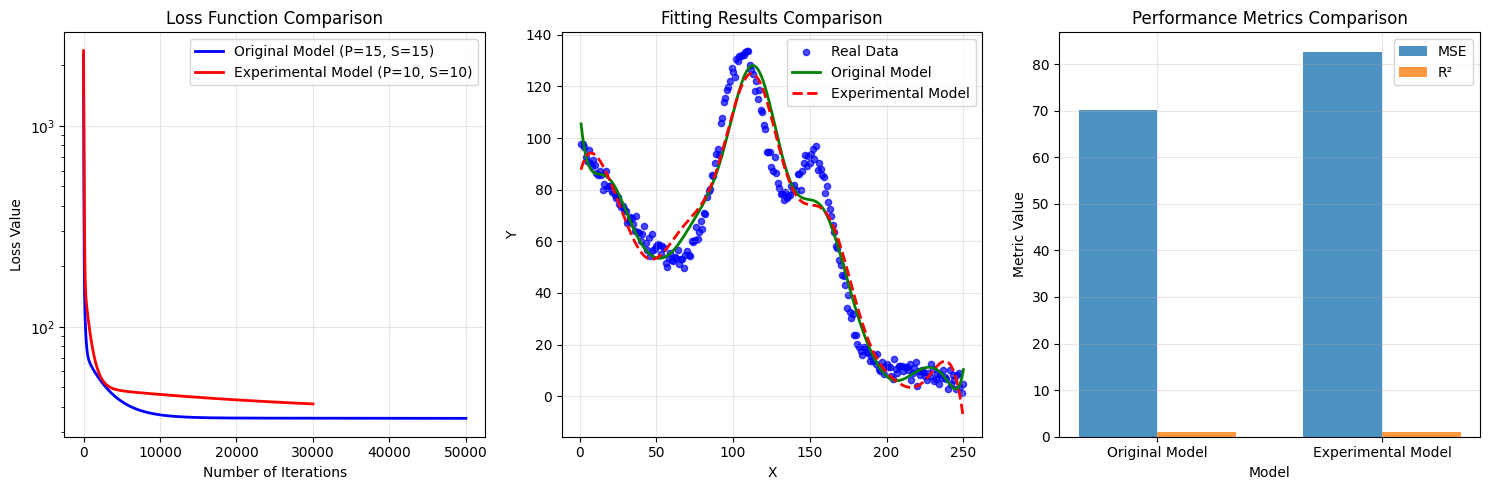


📊 实验结果对比：
   原始模型 - MSE: 70.076304, R²: 0.950660
   实验模型 - MSE: 82.673930, R²: 0.941791
   性能变化: 下降


In [14]:
# 🎮 实验区域 - 尝试修改这些参数
print("🎯 实验参数设置：")

# 你可以修改这些参数来观察效果
experiment_polynomial_degree = 10    # 试试 5, 10, 20
experiment_sinusoid_degree = 10      # 试试 5, 10, 20  
experiment_learning_rate = 0.01      # 试试 0.001, 0.01, 0.1
experiment_iterations = 30000        # 试试 10000, 30000, 50000

print(f"   多项式特征次数: {experiment_polynomial_degree}")
print(f"   正弦特征次数: {experiment_sinusoid_degree}")
print(f"   学习率: {experiment_learning_rate}")
print(f"   迭代次数: {experiment_iterations}")

# 创建实验模型
experiment_model = LinearRegression(
    x, y,
    polynomial_degree=experiment_polynomial_degree,
    sinusoid_degree=experiment_sinusoid_degree,
    normalize_data=True
)

# 训练实验模型
print("\n🚀 开始实验训练...")
(exp_theta, exp_cost_history) = experiment_model.train(
    experiment_learning_rate,
    experiment_iterations
)

# 生成预测
exp_y_predictions = experiment_model.predict(x_predictions)

# 可视化实验结果
plt.figure(figsize=(15, 5))

# 损失函数比较
plt.subplot(1, 3, 1)
plt.plot(cost_history, 'b-', label=f'Original Model (P={polynomial_degree}, S={sinusoid_degree})', linewidth=2)
plt.plot(exp_cost_history, 'r-', label=f'Experimental Model (P={experiment_polynomial_degree}, S={experiment_sinusoid_degree})', linewidth=2)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Value')
plt.title('Loss Function Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# 拟合结果比较
plt.subplot(1, 3, 2)
plt.scatter(x, y, alpha=0.7, color='blue', s=20, label='Real Data')
plt.plot(x_predictions, y_predictions, 'g-', linewidth=2, label='Original Model')
plt.plot(x_predictions, exp_y_predictions, 'r--', linewidth=2, label='Experimental Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting Results Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# 性能指标比较
plt.subplot(1, 3, 3)
exp_y_pred = experiment_model.predict(x)
exp_mse = np.mean((y - exp_y_pred) ** 2)
exp_r2 = 1 - (np.sum((y - exp_y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

models = ['Original Model', 'Experimental Model']
mse_values = [mse, exp_mse]
r2_values = [r2, exp_r2]

x_pos = np.arange(len(models))
width = 0.35

plt.bar(x_pos - width/2, mse_values, width, label='MSE', alpha=0.8)
plt.bar(x_pos + width/2, r2_values, width, label='R²', alpha=0.8)
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Performance Metrics Comparison')
plt.xticks(x_pos, models)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print(f"\n📊 实验结果对比：")
print(f"   原始模型 - MSE: {mse:.6f}, R²: {r2:.6f}")
print(f"   实验模型 - MSE: {exp_mse:.6f}, R²: {exp_r2:.6f}")
print(f"   性能变化: {'提升' if exp_r2 > r2 else '下降'}")

## 🎊 恭喜你完成了非线性回归教程！

### 你已经学会了：
- ✅ 非线性回归的基本原理和特征工程
- ✅ 多项式特征和正弦特征的应用
- ✅ 如何处理复杂的非线性数据关系
- ✅ 模型性能评估和参数调优
- ✅ 如何可视化和分析复杂模型的结果

### 继续学习的方向：
1. **正则化技术**：Ridge回归、Lasso回归防止过拟合
2. **交叉验证**：更科学的模型评估方法
3. **其他非线性方法**：支持向量机、决策树、随机森林
4. **深度学习**：神经网络处理更复杂的非线性关系
5. **时间序列分析**：处理具有时间依赖性的数据

记住：**特征工程是机器学习的艺术！通过巧妙地构造特征，我们可以让简单的线性模型处理复杂的非线性问题。** 🚀